# Multivariate Linear Regression

## 1. Data creation
$$f(x)=\frac{1}{2}x^2+\frac{1}{2}x+\text{error}\\ \text{where} -2.5\lt x\lt2.5$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
num_samples = 200
x = 5 * np.random.rand(num_samples, 1) - 2.5
y = 1/2 * x**2 + 1/2 * x + np.random.rand(num_samples, 1)

In [3]:
x = x.reshape(-1,)
y = y.reshape(-1,)

In [4]:
train_set = pd.DataFrame({'x': x, 'y': y})
train_set.head()

,x,y
0,-0.029497,0.837899
1,-2.235034,1.587267
2,-0.698848,0.118131
3,1.765702,2.891623
4,0.349807,1.178605


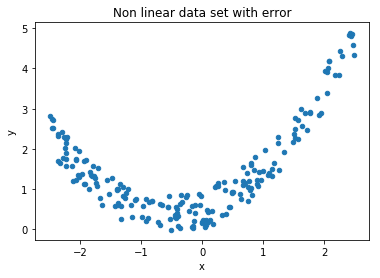

In [5]:
train_set.plot(x='x', y='y', kind='scatter', title='Non linear data set with error')

## 2. Fitting the model

In [6]:
# 2차 이상의 다항식을 fitting 하기 위해서 PolynomialFeatures를 사용합니다.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [7]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x.reshape(-1, 1))

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
lin_reg.intercept_

0.49430630147663834

In [10]:
# Fitting 결과
lin_reg.coef_

array([0.48394626, 0.51279758])

Trainin set과 Predicted curve를 비교해보자.

In [11]:
x_new = np.linspace(-2.5, 2.5, 100).reshape(-1, 1)
x_poly_new = poly_features.fit_transform(x_new)
y_pred = lin_reg.predict(x_poly_new)

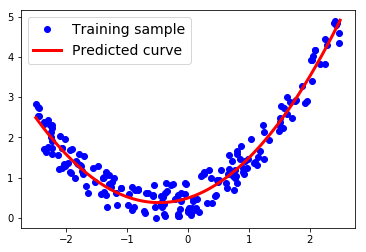

In [12]:
plt.plot(x, y, 'bo', label='Training sample')
plt.plot(x_new, y_pred.reshape(-1, 1), 'r-', linewidth=3, label='Predicted curve')
plt.legend(loc='upper left', fontsize=14)